# Linear Regression of Movie ROI on Actor Dummies
**Goal:** Estimate the effect every actor (in the selected set) has on the movie's ROI. 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import Lasso, Ridge

In [5]:
movies_df = pd.read_csv("data/processed.csv", sep="\t", index_col=0)

movies_df

,roi,Aaron Paul,Aaron Taylor-Johnson,Adam Brody,Adam Sandler,Adria Arjona,Adrien Brody,Aidan Gillen,Al Pacino,Alan Ritchson,...,Winona Ryder,Winston Ellis,Woody Harrelson,Yvonne Strahovski,Zac Efron,Zach Galifianakis,Zazie Beetz,Zendaya,Zhang Ziyi,Zoe Saldaña
title,,,,,,,,,,,,,,,,,,,,,
Gladiator,4.519575,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Final Destination,4.907839,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
American Psycho,4.900000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mission: Impossible II,4.371105,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cast Away,4.773690,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Order,0.098522,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Damsel,0.000083,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ghostbusters: Frozen Empire,2.019675,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## EDA
A couple questions:
- What does the distribution of ROI look like?
- Which actors are most strongly correlated?

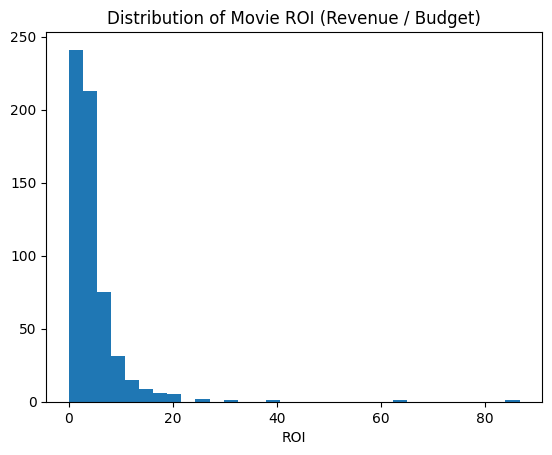

In [9]:
plt.hist(movies_df["roi"], bins=32)
plt.xlabel("ROI")
plt.title("Distribution of Movie ROI (Revenue / Budget)")
plt.show()

**What does the distribution of ROI look like?**

It looks highly skewed right, almost like an exponential distribution or even a chi-squared distribution. This seems right, as we'd expect most movies to have revenues to just cover their budget while very few become highly profitable.

In [12]:
actors = movies_df.drop(columns=["roi"])
actors_corr = actors.corr()
corr_pairs = actors_corr \
                .unstack() \
                .drop(labels=[(actor, actor) for actor in actors_corr.columns]) \
                .drop_duplicates() \
                .sort_values(ascending=False)

corr_pairs.head(20)

Jaimie Alexander    Kat Dennings        1.000000
Adam Sandler        Jackie Sandler      0.912105
Jackie Sandler      Sunny Sandler       0.893678
Dakota Johnson      Jennifer Ehle       0.865301
Daniel Radcliffe    Emma Watson         0.840779
Ben Stiller         Robin Williams      0.815815
Evan Peters         Lucas Till          0.815815
Hayden Christensen  Rachel Bilson       0.815815
Emile Hirsch        Timothy Olyphant    0.815815
Donald Sutherland   Jena Malone         0.815128
Adam Sandler        Sunny Sandler       0.815128
Elizabeth Olsen     Kerry Condon        0.798322
Liv Tyler           Viggo Mortensen     0.748325
Karen Gillan        Pom Klementieff     0.718530
Marisa Tomei        Tom Holland         0.718530
Kevin James         Sunny Sandler       0.705925
Kate Winslet        Shailene Woodley    0.705925
Jena Malone         Julianne Moore      0.705925
Emile Hirsch        James Remar         0.705925
Geoffrey Rush       Johnny Depp         0.676633
dtype: float64

**Which actors are most strongly correlated?**

A few interesting observations:
- Movie franchises or series give pairs of actors lots of opportunity to be casted together (i.e. Fifty Shades of Grey, Thor, Spiderman, Pirates of the Carribean)
- Adam Sandler and his children!

## Modeling

## OLS Regression

In [36]:
X = sm.add_constant(actors)
y = movies_df["roi"]

ols_reg = sm.OLS(y, X).fit()

print(ols_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    roi   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                 -1.378
Method:                 Least Squares   F-statistic:                    0.2649
Date:                Tue, 02 Sep 2025   Prob (F-statistic):               1.00
Time:                        10:10:30   Log-Likelihood:                -1709.9
No. Observations:                 601   AIC:                             4368.
Df Residuals:                     127   BIC:                             6453.
Df Model:                         473                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [37]:
actor_coefs_ols = ols_reg.params.drop("const").sort_values(ascending=False)

actor_coefs_ols.head(20)

Catherine Corcoran     30.863286
Kerry Condon           28.511881
Rosemary Howard        26.641830
Annabelle Wallis       20.200502
Julianne Moore         16.076572
Ed Harris              15.627712
Owen Wilson            14.546889
Angela Bassett         14.451128
Christopher Plummer    14.079765
Dermot Mulroney        12.992087
James Remar            12.363370
Liv Tyler              12.179620
Winona Ryder           11.651997
Joey King              11.642544
Mahershala Ali         11.288524
Aidan Gillen           11.200306
Emma Watson            10.791196
Titus Welliver         10.656953
Jack Quaid             10.615134
Kurt Russell            9.870794
dtype: float64

In [38]:
actor_coefs_ols.tail(20)

Chris Evans          -10.499974
Donald Sutherland    -10.533285
Asa Butterfield      -10.563147
Gustaf Skarsgård     -10.993573
Madison Wolfe        -11.186062
Lee Byung-hun        -11.197445
Daniel Radcliffe     -11.313324
Aaron Paul           -11.369847
Millie Bobby Brown   -12.069751
Tim Roth             -12.178099
Essie Davis          -12.306548
Vincent Cassel       -12.512924
Robert Downey Jr.    -12.539956
Freddie Stroma       -13.760013
Logan Lerman         -14.417260
Bruce Willis         -15.778301
Kevin James          -16.224137
Jodie Foster         -16.346849
Robin Williams       -18.272865
Hailee Steinfeld     -18.579150
dtype: float64

## Lasso Regression

In [39]:
X = actors
y = y

lasso_reg = Lasso(alpha=1e-2)
lasso_reg.fit(X, y)

actor_coefs_lasso = pd.Series(
    lasso_reg.coef_,
    index=X.columns
).sort_values(ascending=False)

actor_coefs_lasso.head(20)

Catherine Corcoran    30.360119
Annabelle Wallis      16.958624
Rosemary Howard       15.556877
Mila Kunis            10.134850
Viggo Mortensen        5.864709
Joey King              3.374196
Jennifer Ehle          3.166499
Edi Gathegi            3.043511
Linda Cardellini       2.931334
Patrick Wilson         2.575176
Marlon Wayans          2.476531
Bill Skarsgård         2.361782
Sebastian Stan         2.331958
Vera Farmiga           2.244920
Mia Goth               1.895980
Brittany Snow          1.884409
Anna Kendrick          1.751222
Zach Galifianakis      1.722506
Emma Watson            1.679540
Josh Hutcherson        1.667533
dtype: float64

In [40]:
actor_coefs_lasso.tail(20)

Yvonne Strahovski       -0.764294
Holt McCallany          -0.771341
Antonio Banderas        -0.803440
Samara Weaving          -0.813144
Christian Slater        -0.815227
Ron Perlman             -0.817106
Arnold Schwarzenegger   -0.859596
Mark Wahlberg           -0.892333
Lee Byung-hun           -0.904168
Liam Neeson             -0.938733
Jon Bernthal            -0.944383
Ben Affleck             -0.961511
Dave Bautista           -1.072012
Scott Adkins            -1.192911
Millie Bobby Brown      -1.231961
Frank Grillo            -1.316905
Mckenna Grace           -1.639323
Aaron Taylor-Johnson    -2.694541
Jesse Plemons           -2.754446
Madison Wolfe           -6.737611
dtype: float64

# Ridge Regression

In [41]:
X = X
y = y

ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X, y)

actor_coefs_ridge = pd.Series(
    ridge_reg.coef_,
    index=X.columns
).sort_values(ascending=False)

actor_coefs_ridge.head(20)

Catherine Corcoran     29.961538
Rosemary Howard        22.613829
Annabelle Wallis       19.184555
Kerry Condon           10.563030
Mila Kunis             10.017917
Joey King               9.199905
Linda Cardellini        7.664513
Sam Worthington         7.518048
Christopher Plummer     7.280008
Vincent D'Onofrio       7.105462
Kurt Russell            6.631288
Monica Bellucci         6.560289
Mia Goth                6.361023
Keira Knightley         6.351737
Austin Butler           6.303315
Sebastian Stan          6.200625
Andie MacDowell         5.974450
Emma Watson             5.953041
Winona Ryder            5.753264
Elizabeth Banks         5.601617
dtype: float64

In [42]:
actor_coefs_ridge.tail(20)

Asa Butterfield         -5.765821
Lee Byung-hun           -5.886009
Mckenna Grace           -5.986992
Jodie Foster            -6.083857
Sarah Paulson           -6.112570
Eric Dane               -6.115116
James Franco            -6.190231
Sam Rockwell            -6.234101
Emily Child             -6.411413
Millie Bobby Brown      -6.485039
Eric Bana               -6.501810
Aaron Taylor-Johnson    -6.729982
Donald Sutherland       -7.146749
Bruce Willis            -7.649478
Vincent Cassel          -8.096965
Logan Lerman            -8.127967
Essie Davis             -8.432643
Hailee Steinfeld        -8.521800
Freddie Stroma          -9.210126
Madison Wolfe          -10.693022
dtype: float64

In [45]:
actor_coefs_avg = (actor_coefs_ols + actor_coefs_lasso + actor_coefs_ridge) / 3
actor_coefs_avg.sort_values(ascending=False, inplace=True)

actor_coefs_avg.head(20)

Catherine Corcoran     30.394981
Rosemary Howard        21.604179
Annabelle Wallis       18.781227
Kerry Condon           13.024970
Mila Kunis              9.503853
Joey King               8.072215
Christopher Plummer     7.119924
Ed Harris               6.960648
Julianne Moore          6.530817
Angela Bassett          6.507196
Emma Watson             6.141259
Linda Cardellini        6.071924
Sam Worthington         6.034804
Dermot Mulroney         5.975660
Winona Ryder            5.907593
Owen Wilson             5.750120
Sebastian Stan          5.681858
Kurt Russell            5.567213
Monica Bellucci         5.553135
Mia Goth                5.546234
dtype: float64

In [46]:
actor_coefs_avg.tail(20)

Eric Bana              -5.308118
Mckenna Grace          -5.346214
Daniel Radcliffe       -5.346987
Robert Downey Jr.      -5.424085
Asa Butterfield        -5.442989
Aaron Taylor-Johnson   -5.466705
Tim Roth               -5.594926
Donald Sutherland      -5.893345
Lee Byung-hun          -5.995874
Kevin James            -6.161481
Millie Bobby Brown     -6.595584
Vincent Cassel         -6.869963
Essie Davis            -6.913064
Jodie Foster           -7.476902
Logan Lerman           -7.515075
Freddie Stroma         -7.656713
Robin Williams         -7.789182
Bruce Willis           -7.984784
Hailee Steinfeld       -9.033650
Madison Wolfe          -9.538898
dtype: float64

In [52]:
movies_df[movies_df["Emma Watson"] == 1]

,roi,Aaron Paul,Aaron Taylor-Johnson,Adam Brody,Adam Sandler,Adria Arjona,Adrien Brody,Aidan Gillen,Al Pacino,Alan Ritchson,...,Winona Ryder,Winston Ellis,Woody Harrelson,Yvonne Strahovski,Zac Efron,Zach Galifianakis,Zazie Beetz,Zendaya,Zhang Ziyi,Zoe Saldaña
title,,,,,,,,,,,,,,,,,,,,,
Harry Potter and the Philosopher's Stone,7.811804,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Harry Potter and the Chamber of Secrets,8.766885,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Harry Potter and the Prisoner of Azkaban,6.075420,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Harry Potter and the Goblet of Fire,5.972807,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Harry Potter and the Order of the Phoenix,6.254752,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Harry Potter and the Half-Blood Prince,3.735837,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Harry Potter and the Deathly Hallows: Part 1,3.817223,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Harry Potter and the Deathly Hallows: Part 2,10.732090,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Beauty and the Beast,7.913225,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
